# Context
Diabetes is a chronic disease requiring long-term monitoring.
The objective is to predict disease progression from baseline clinical measurements.


# Import

In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, get_scorer_names
from sklearn.preprocessing import StandardScaler 
from sklearn.base import clone

# Data exploration

In [2]:
data = load_diabetes(as_frame = True)

In [3]:
data.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
data_na = data.frame.isna().sum()
print(data_na)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
X = data.data
y = data.target
print(X.shape, y.shape)

(442, 10) (442,)


In [6]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.268604e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


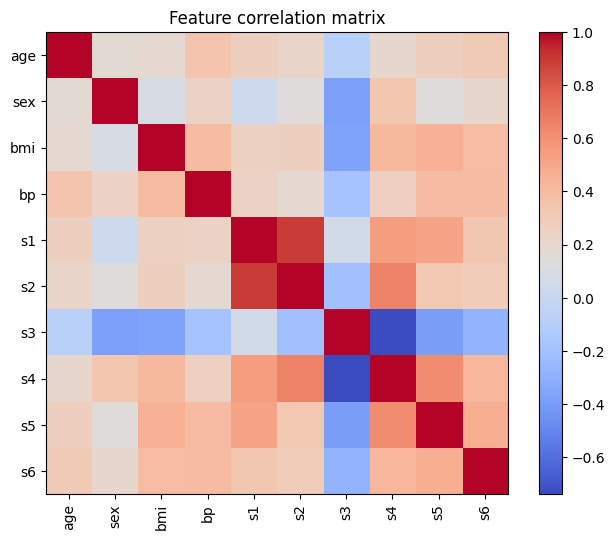

In [33]:
corr = X.corr()
features = corr.columns
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(np.arange(len(features)), features, rotation = 90)
plt.yticks(np.arange(len(features)), features)
plt.title("Feature correlation matrix")
out_dir = Path("..") / "reports" / "figures"
out_dir.mkdir(parents=True, exist_ok=True)

plt.savefig(out_dir / "Feature_correlation_matrix.png", bbox_inches="tight", dpi=300)
plt.show()


# Def dataset, models and scoring

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [11]:
models = {
    "regression" : linear_model.LinearRegression(),
    "ridge" : linear_model.Ridge(alpha =.5),
    "lasso" : linear_model.Lasso(alpha = 0.5),
}


In [12]:
scoring = {
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
    "r2": "r2"
}

# Model selection via cross validation

In [ ]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    cv = cross_validate(pipeline, X, y, scoring = scoring, cv = 5)
    results.append({
        "model": name,
        "MSE": -cv["test_rmse"].mean(),
        "R2": cv["test_r2"].mean(),
        "MAE": -cv["test_mae"].mean(),
    })
    
results_df = pd.DataFrame(results)

In [14]:
results_df

,model,MSE,R2,MAE
0,regression,54.691791,0.482316,44.276499
1,ridge,54.693189,0.482298,44.265926
2,lasso,54.718416,0.481763,44.349898


In [15]:
best_models = results_df.iloc[results_df["R2"].idxmax()]
print(best_models)

model    regression
MSE       54.691791
R2         0.482316
MAE       44.276499
Name: 0, dtype: object


# Test model

In [27]:
y_baseline = np.full_like(y_test, y_train.mean())
print("Baseline MAE:", mean_absolute_error(y_test, y_baseline))


Baseline MAE: 64.00646146990485


In [16]:
best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",clone(models[best_models["model"]])),
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"Mean squared error : {mean_squared_error(y_test, y_pred)}")
print(f"R2 score : {r2_score(y_test, y_pred)}")
print(f"Mean absolute error : {mean_absolute_error(y_test, y_pred)}")

Mean squared error : 2900.1936284934827
R2 score : 0.45260276297191926
Mean absolute error : 42.794094679599944


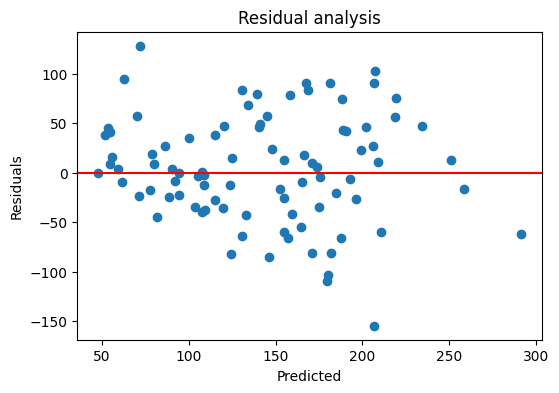

In [34]:

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual analysis")
plt.savefig(out_dir / "residual_analysis.png", bbox_inches="tight", dpi=300)
plt.show()


In [17]:
coef = best_model.named_steps["model"].coef_
features = X.columns

coef_df = pd.DataFrame({
    "feature": features,
    "coefficient": coef
}).sort_values(by="coefficient", ascending=True)

coef_df


,feature,coefficient
4,s1,-44.448856
1,sex,-11.511809
0,age,1.753758
9,s6,2.351364
6,s3,7.676978
7,s4,13.138784
3,bp,16.828872
5,s2,24.640954
2,bmi,25.607121
8,s5,35.161195


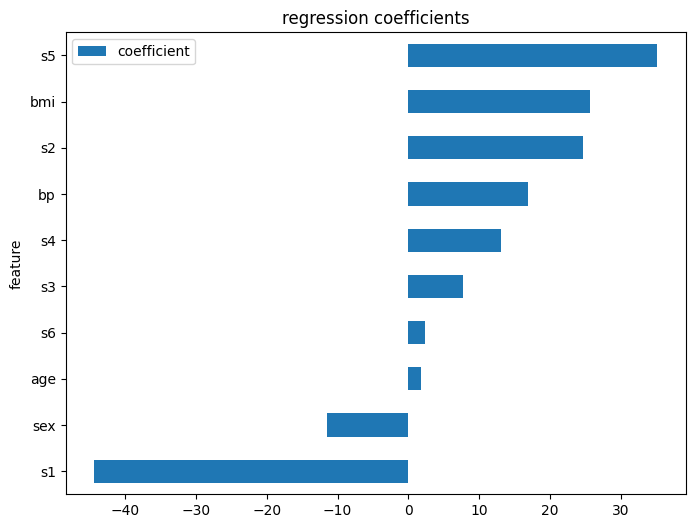

In [35]:
coef_df.plot(
    x="feature",
    y="coefficient",
    kind="barh",
    figsize=(8, 6),
    title="regression coefficients"
)
plt.savefig(out_dir / "regression_coefficients.png", bbox_inches="tight", dpi=300)
plt.show()
